<a href="https://colab.research.google.com/github/juandasa57/iaeng_JDSG_DTV/blob/main/Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import itertools
from sklearn import preprocessing

# Se lee el archivo train 
En este dataframe se puede observar que se tiene 81 columnas, en las que hay columnas con variables categorias y númericas.

In [ ]:
d=pd.read_csv("train.csv")
d.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Descripción de los datos train.
En este espacio se saca las información de los tipos de variables que se tiene en el dataframe train.

In [ ]:
d.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

# Filtrado de datos númericos
En los datos train se filtra las columnas que tiene datos que son númericos. En la categoria númerica quedan 38 columnas de los 81 columnas iniciales.


In [ ]:
numerico= d.select_dtypes('number')
numerico

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
colum_numericos=numerico.columns
print("Variable numéricos: ")
for i in range(len(colum_numericos)-1):
  print("*",colum_numericos[i+1])

Variable numéricos: 
* MSSubClass
* LotFrontage
* LotArea
* OverallQual
* OverallCond
* YearBuilt
* YearRemodAdd
* MasVnrArea
* BsmtFinSF1
* BsmtFinSF2
* BsmtUnfSF
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* LowQualFinSF
* GrLivArea
* BsmtFullBath
* BsmtHalfBath
* FullBath
* HalfBath
* BedroomAbvGr
* KitchenAbvGr
* TotRmsAbvGrd
* Fireplaces
* GarageYrBlt
* GarageCars
* GarageArea
* WoodDeckSF
* OpenPorchSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal
* MoSold
* YrSold
* SalePrice


En la categoria númerica, se encuentra 3 tipos de datos, los cuales son: los datos temporales, los datos continuos y los datos discretos. En los datos temporales se encuentra los datos relacionados con años, en los datos continuos se encuentran aquellos valores que pueden tomar una gran variedad de números y los datos discretos son valores de números que vienen por categorias. En este espacio se busca filtrar los datos temporales. 

# Filtrado de datos temporales.
En esta seccion se filtra los datos temporales, los cuales son 4: el año de contrucción, el año de remodelación, el año de remodelación del garaje y el año de puesta a la venta.

In [ ]:
temporales = [feature for feature in numerico if 'Yr' in feature or 'Year' in feature]
n_temporales_train=d[temporales]
n_temporales_train

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


Se describe de los datos temporales.

In [ ]:
n_temporales_train.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.0,1994.0,2004.0,2010.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0


# Gráfica de los datos númericos temporales.
Se gráfica los datos númericos temporales vs el precio.

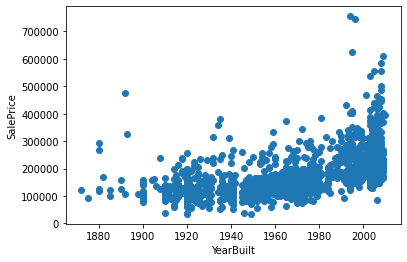

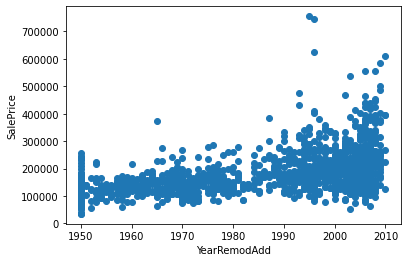

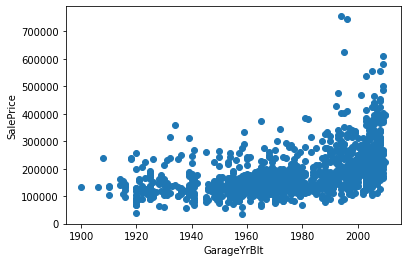

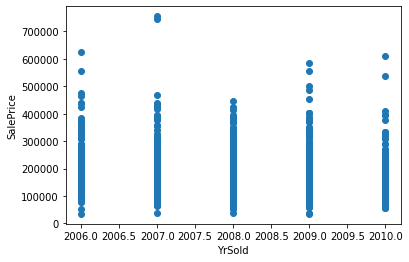

In [ ]:
for feature in n_temporales_train:
        data_train = d.copy()
        plt.scatter(data_train[feature], data_train['SalePrice'])        
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Filtrado de datos númericos discretos.
De este filtrado de datos se obtienen 17 columnas y 1460 filas.

In [ ]:
n_discretos_train = [feature for feature in numerico if len(d[feature].unique()) < 25 and feature not in temporales + ['Id']]
print('Variables numericos discretos: {}'.format(len(n_discretos_train)))
vn_discretos_train=d[n_discretos_train]
vn_discretos_train

Variables numericos discretos: 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


Descripción de los datos númericos discretos.

In [ ]:
vn_discretos_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.0,190.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.0,9.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.0,572.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.0,0.0,0.0,2.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.0,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.0,0.0,1.0,2.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.0,8.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.0,1.0,1.0,3.0


# Gráfica de los datos numericos discretos.
Se grafica los valores númericos vs el precio de venta de los datos discretos.

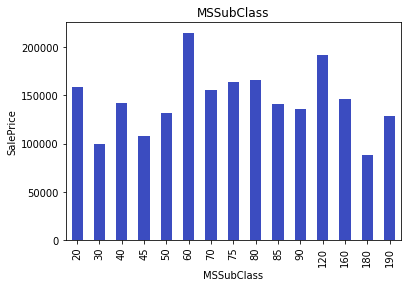

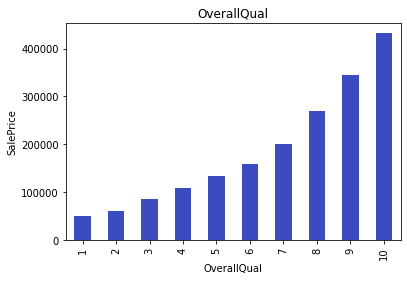

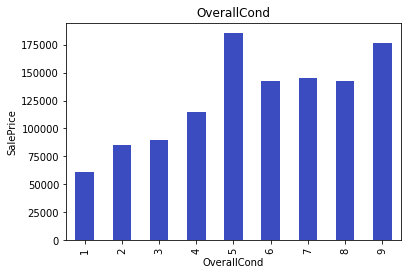

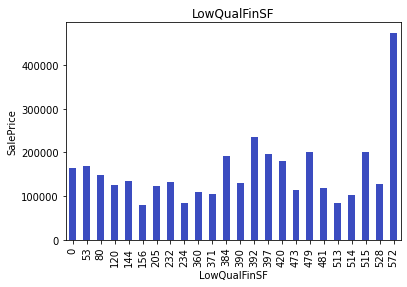

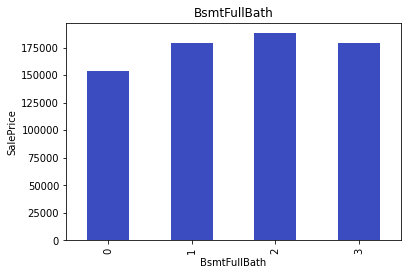

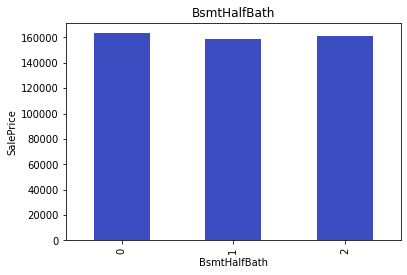

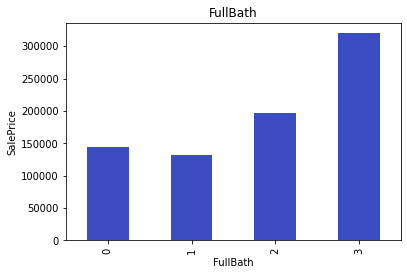

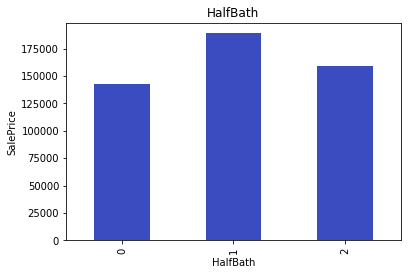

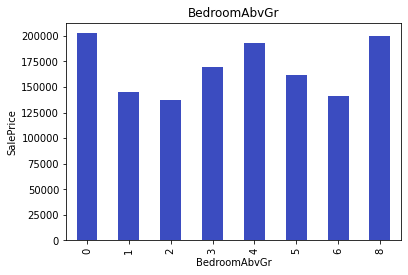

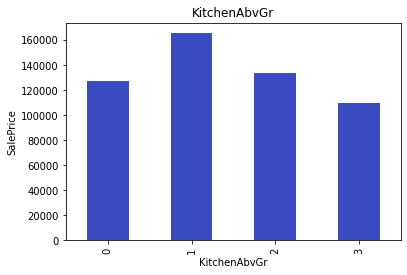

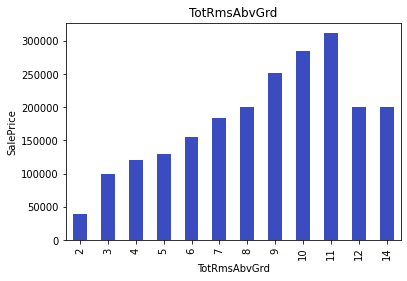

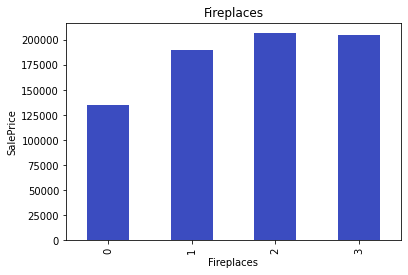

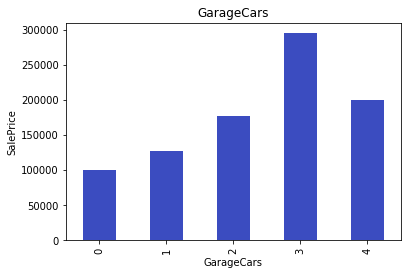

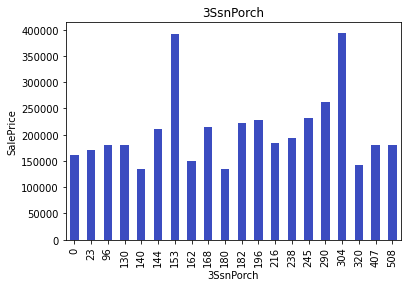

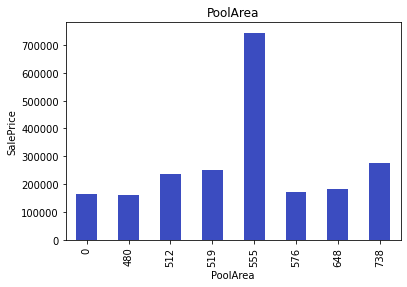

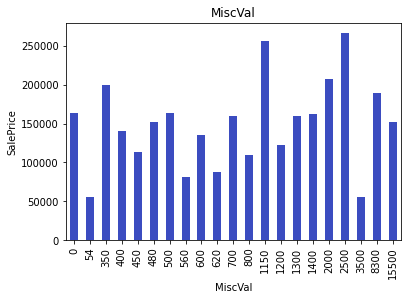

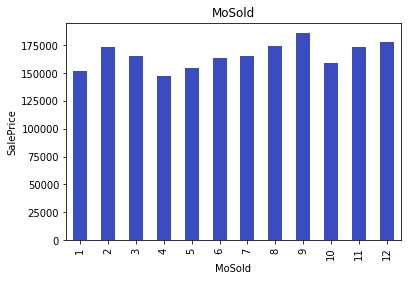

In [ ]:

cmap = cm.get_cmap('coolwarm')
for feature in vn_discretos_train:
    data_train = d.copy()
    data_train.groupby(feature)['SalePrice'].median().plot.bar( cmap = cmap, stacked= True)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Filtrado de datos númericos continuos.
Se hace un filtrado para obtener los datos númericos continuos.

In [ ]:
column=np.array(numerico.columns)
variables_continuas=[]
for i in range(len(column)):
  variables_continuas.append(column[i])

colum_to=n_discretos_train+temporales 

for i in range(len(colum_to)):
  variables_continuas.remove(colum_to[i])

variables_continuas.remove('Id')
print('Variables continuas: {}'.format(len(variables_continuas)))
nv_continuas_train=d[variables_continuas]
nv_continuas_train


Variables continuas: 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


Descripción de los datos númericos continuos.

In [ ]:
nv_continuas_train.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0


# Gráficos de datos numericos continuos.

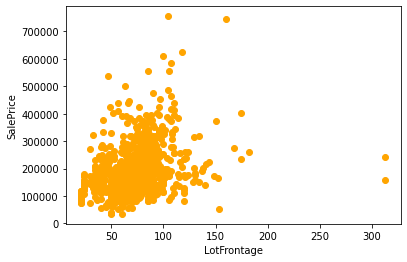

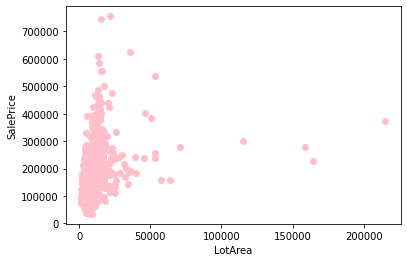

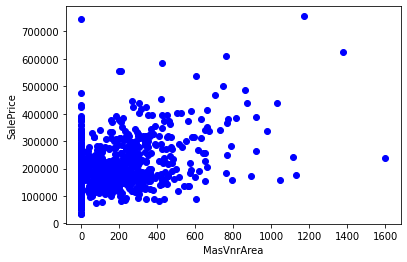

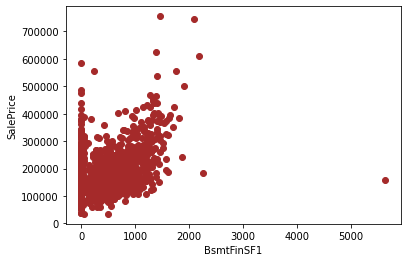

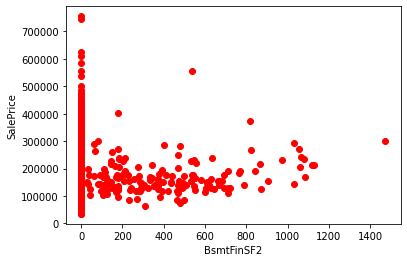

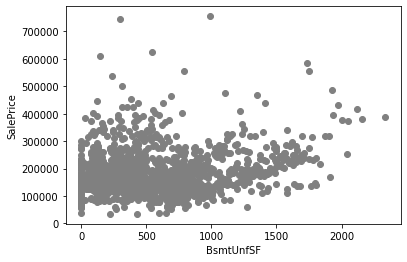

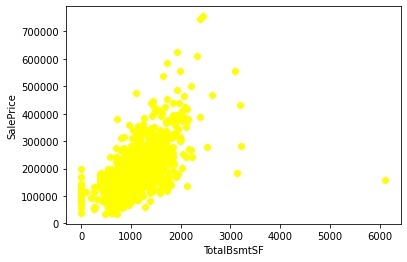

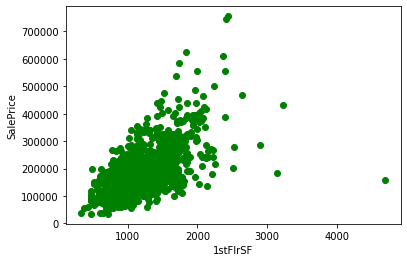

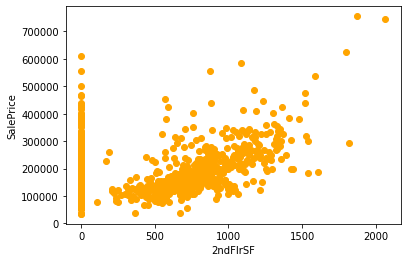

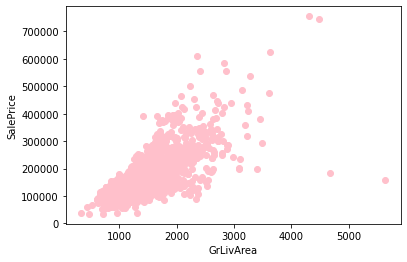

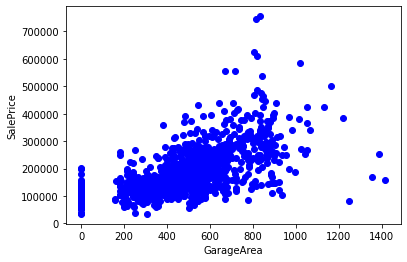

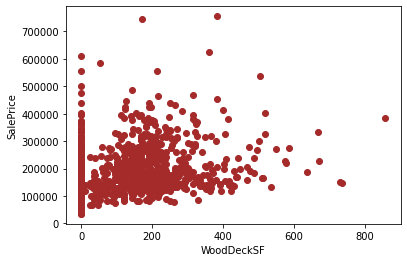

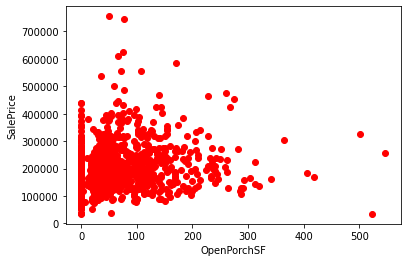

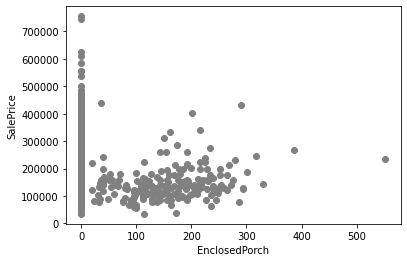

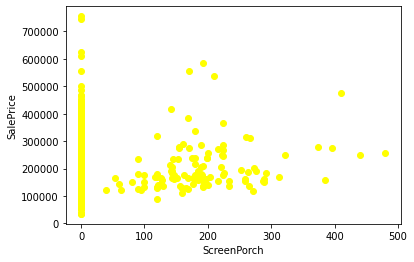

In [ ]:
color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
for feature in nv_continuas_train:

   if feature != 'SalePrice':
        data_train = d.copy()
        plt.scatter(data_train[feature], data_train['SalePrice'], color= next(color_cycle))
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Correlación de los datos númericos.
En el siguiente grafico se busca observar la correlación de los datos númericos con el precio de venta.

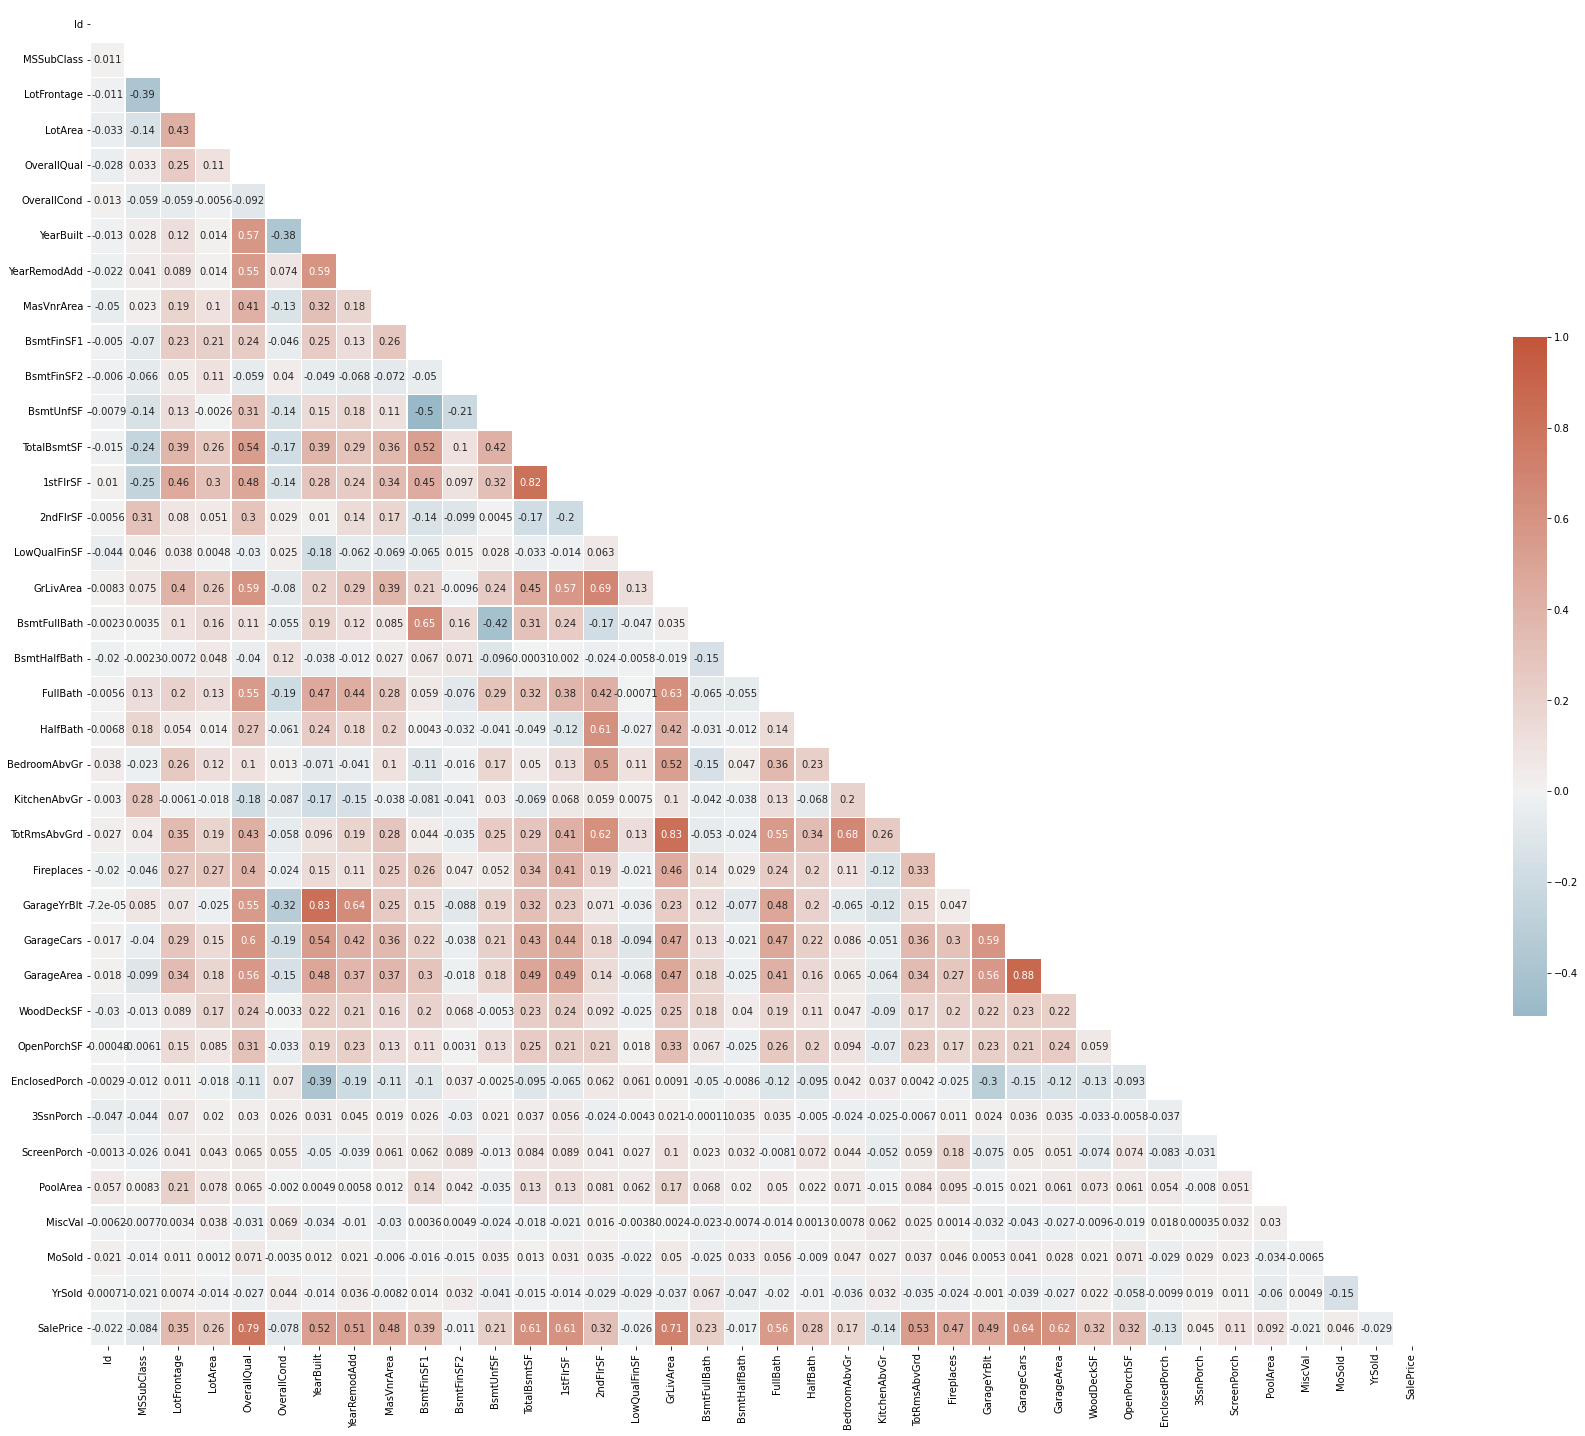

In [ ]:
f, ax = plt.subplots(figsize=(30, 25))
mat = numerico.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Se filtran los datos de correlación que sean mayor a 0.2.

In [ ]:
correl=mat['SalePrice']>0.2
indices=numerico.columns
correlacion=[]
print("Las correlaciones mayores a 0.2 son:")
for i in range(len(correl)):
  if correl[i]== True:
    print("*",indices[i])
    correlacion.append(indices[i])




Las correlaciones mayores a 0.2 son:
* LotFrontage
* LotArea
* OverallQual
* YearBuilt
* YearRemodAdd
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* BsmtFullBath
* FullBath
* HalfBath
* TotRmsAbvGrd
* Fireplaces
* GarageYrBlt
* GarageCars
* GarageArea
* WoodDeckSF
* OpenPorchSF
* SalePrice


In [ ]:
data_correlacion_num=numerico[correlacion]
data_correlacion_num

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,2,1,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,2,1,7,1,1999.0,2,460,0,40,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,2,0,7,2,1978.0,2,500,349,0,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,2,0,9,2,1941.0,1,252,0,60,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,1,0,5,0,1950.0,1,240,366,0,142125


De los 38 datos númericos se obtienen 23 que tienen una correlación mayor a la deseada.



# Filtrado de datos categóricos.
En los datos train se filtra las columnas que tienen datos que son catégorias. Este filtrado contiene 43 columnasy 1460 filas. 

In [ ]:
objecto=d.describe(include='O')
colum=np.array(objecto.columns)
objetos=d[colum]
objetos.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


# Gráfica de los valores catégoricos.

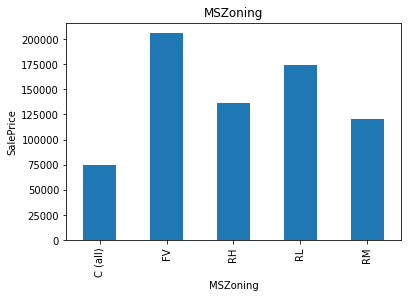

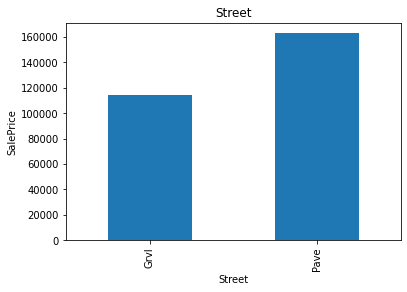

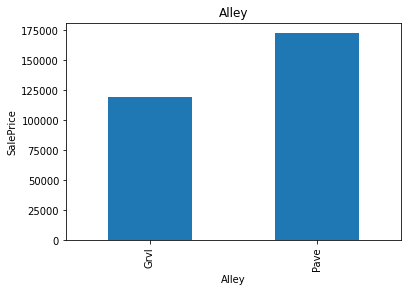

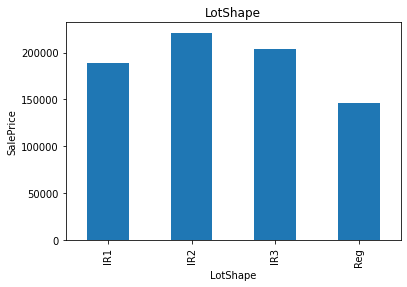

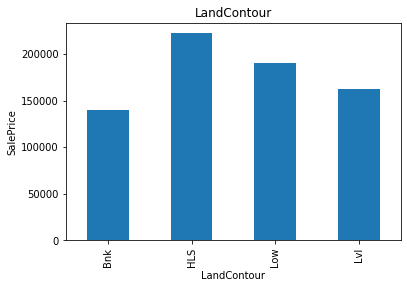

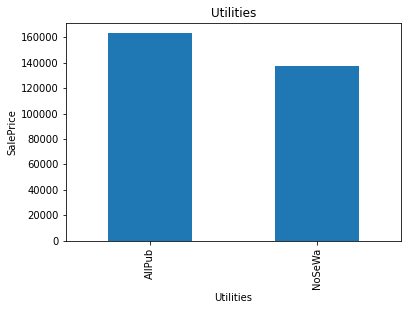

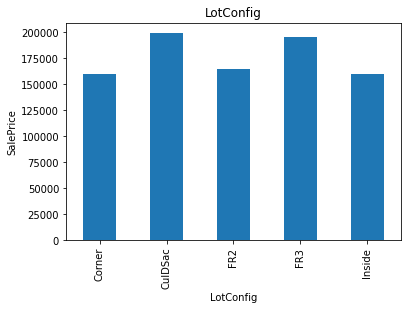

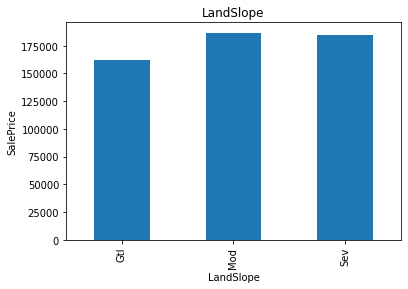

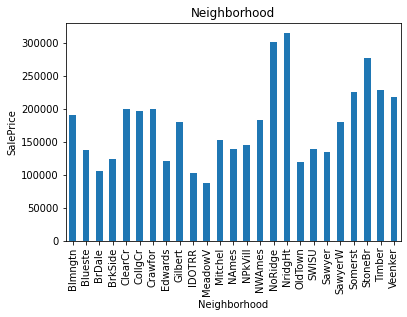

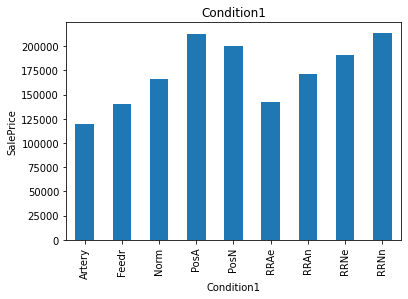

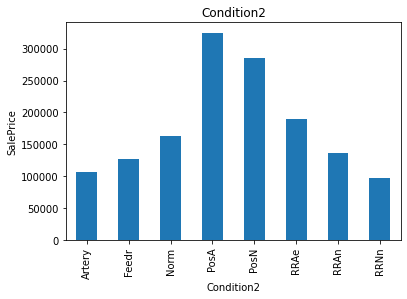

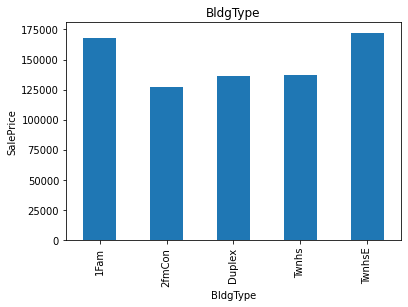

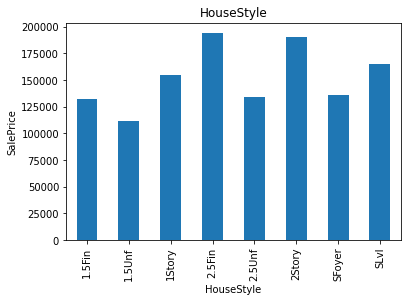

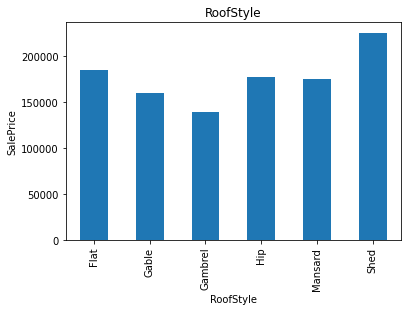

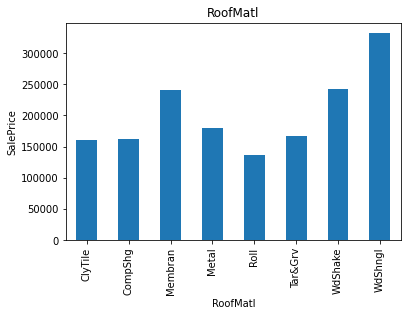

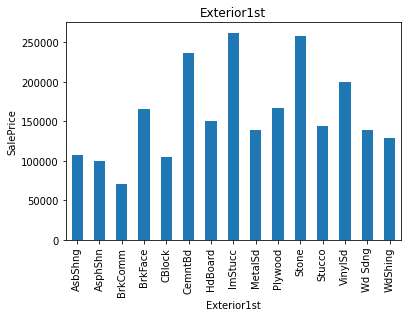

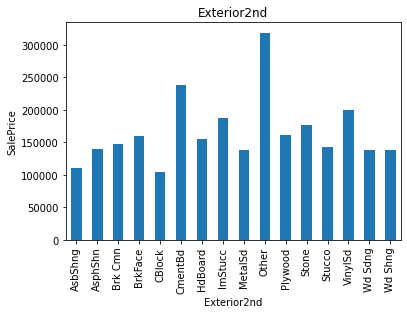

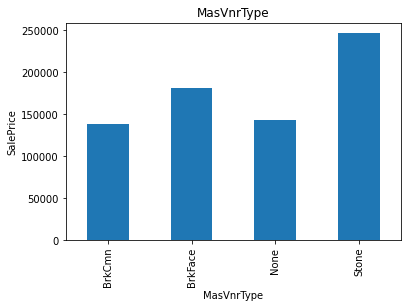

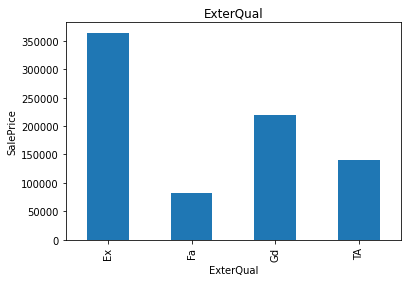

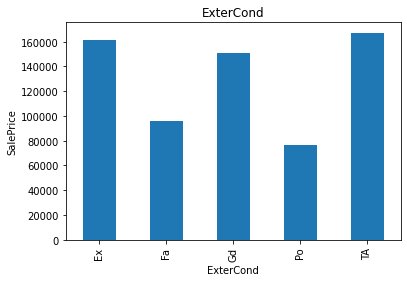

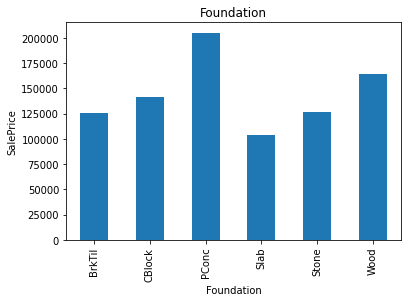

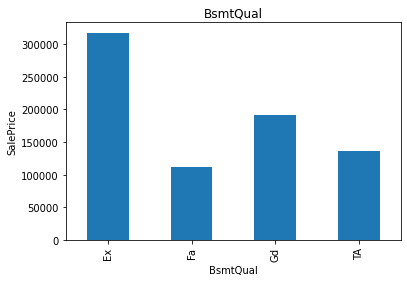

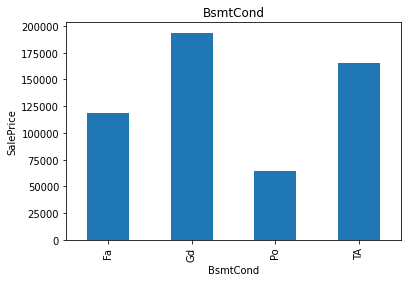

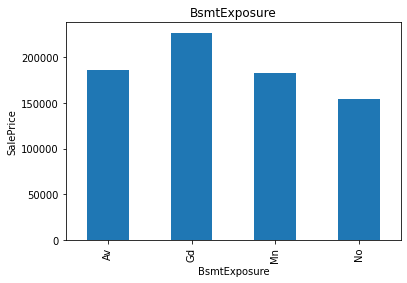

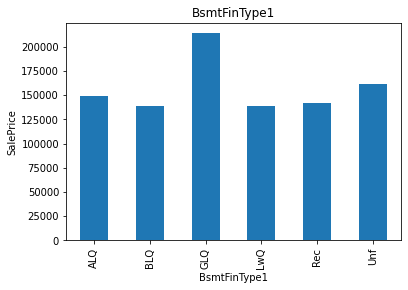

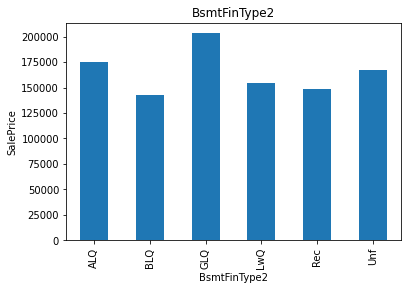

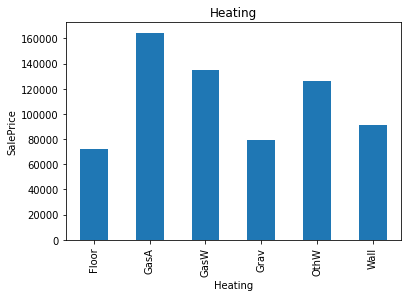

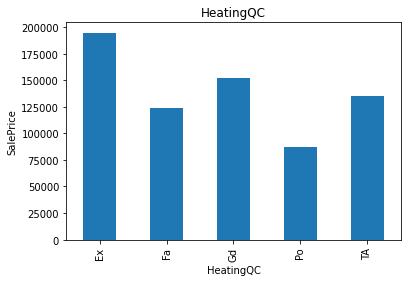

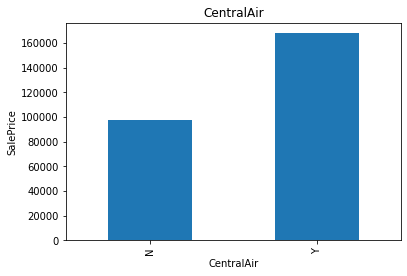

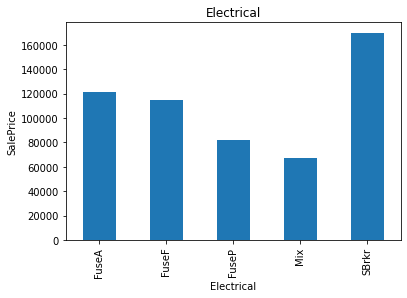

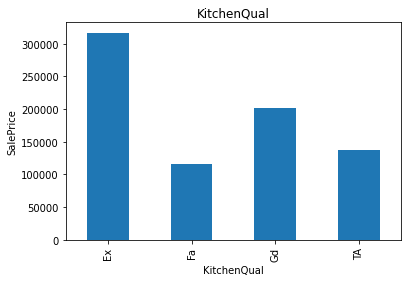

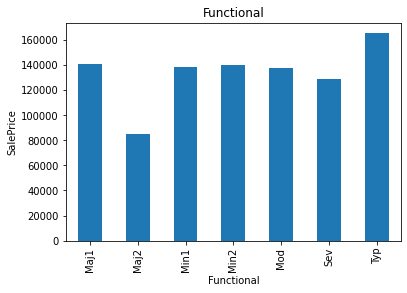

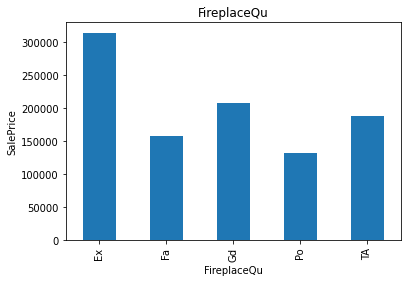

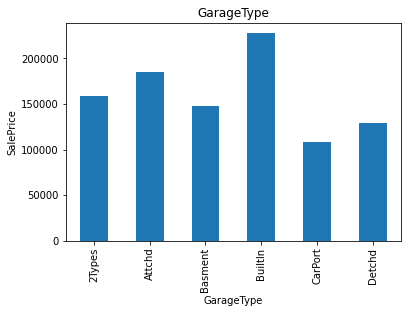

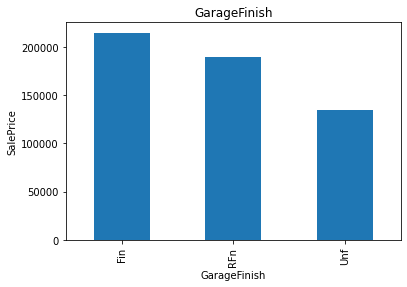

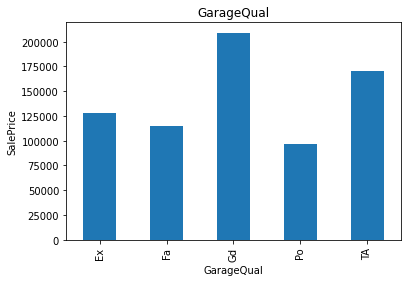

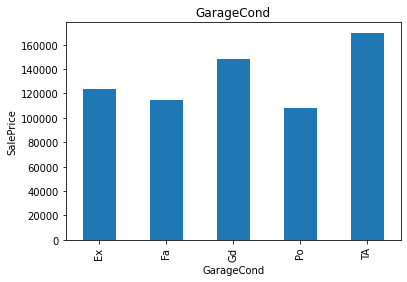

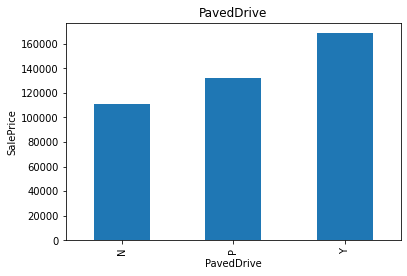

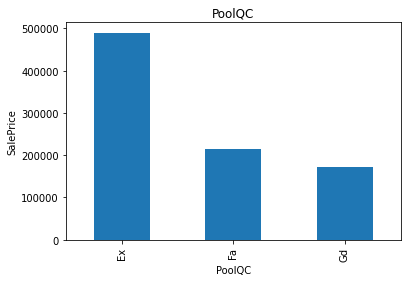

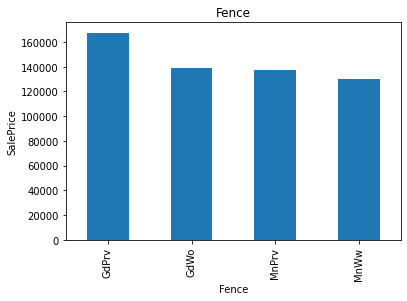

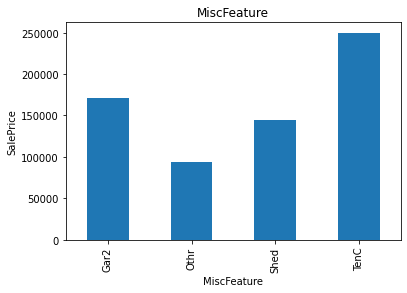

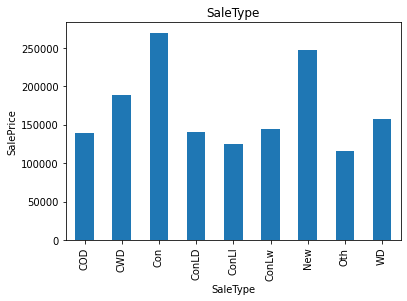

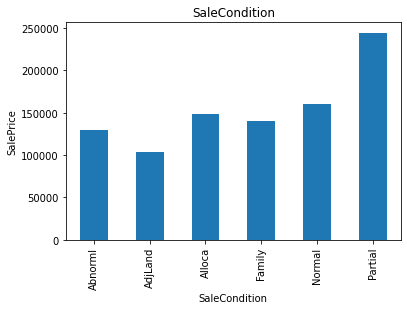

In [ ]:
for feature in objetos:
    data_train = d.copy()
    data_train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Se obtienen las opciones de las catégorias unicas de los datos catégoricos.

In [ ]:
for col in objetos:
    print(col, d[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

A cada valor categorico único se le asigna un valor númerico.

In [ ]:
lon=objetos.shape[1]
columnas_c=np.array(objetos. columns)
for i in range(lon):
  le = preprocessing.LabelEncoder()
  lista=objetos[columnas_c[i]]
  le.fit(lista.unique())
  lista1=le.transform(lista)
  agre= pd.DataFrame(lista1)
  objetos[columnas_c[i]]=agre
objetos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,3,3,0,4,0,8,2,...,1,1,4,4,2,3,4,4,8,4
1456,3,1,2,3,3,0,4,0,14,2,...,1,2,4,4,2,3,2,4,8,4
1457,3,1,2,3,3,0,4,0,6,2,...,1,1,4,4,2,3,0,2,8,4
1458,3,1,2,3,3,0,4,0,12,2,...,1,2,4,4,2,3,4,4,8,4


En el dataframe objetos se agrega la columna de precios

In [ ]:
objetos.insert(43,'SalePrice',np.array(d['SalePrice']))
objetos

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3,1,2,3,3,0,4,0,5,2,...,1,4,4,2,3,4,4,8,4,208500
1,3,1,2,3,3,0,2,0,24,1,...,1,4,4,2,3,4,4,8,4,181500
2,3,1,2,0,3,0,4,0,5,2,...,1,4,4,2,3,4,4,8,4,223500
3,3,1,2,0,3,0,0,0,6,2,...,2,4,4,2,3,4,4,8,0,140000
4,3,1,2,0,3,0,2,0,15,2,...,1,4,4,2,3,4,4,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,3,3,0,4,0,8,2,...,1,4,4,2,3,4,4,8,4,175000
1456,3,1,2,3,3,0,4,0,14,2,...,2,4,4,2,3,2,4,8,4,210000
1457,3,1,2,3,3,0,4,0,6,2,...,1,4,4,2,3,0,2,8,4,266500
1458,3,1,2,3,3,0,4,0,12,2,...,2,4,4,2,3,4,4,8,4,142125


# Correlacion de las variables categoricas.
En el siguiente grafico se busca observar la correlación de los datos catégoricos con el precio de venta.

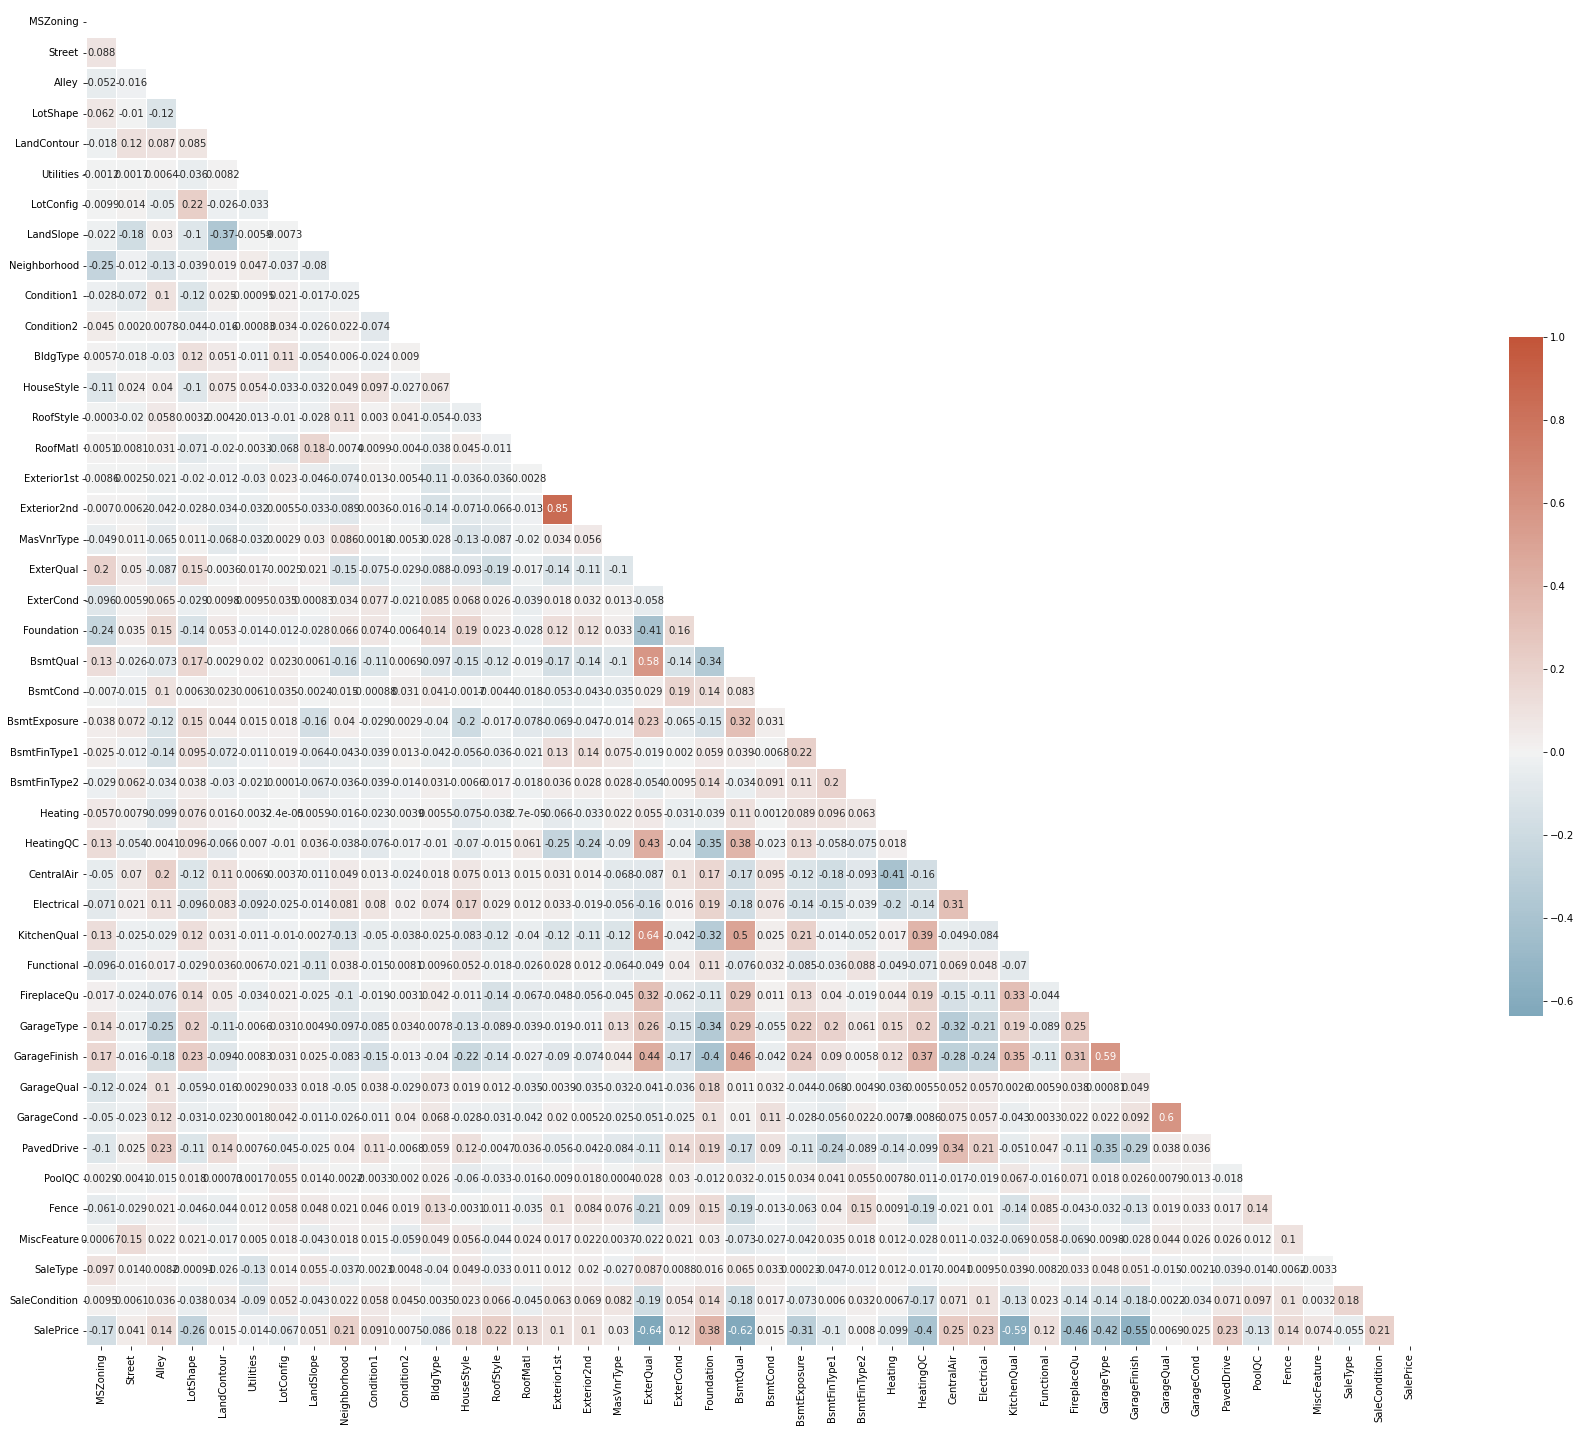

In [ ]:
f, ax = plt.subplots(figsize=(30, 25))
matc = objetos.corr('pearson')
mask = np.triu(np.ones_like(matc, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(matc, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Se obtienen las correlaciones mayores a 0.2 respecto al precio.

In [ ]:
correlc=matc['SalePrice']>0.2
indicesc=objetos.columns
correlacionc=[]
print("Las correlaciones mayores a 0.2 son:")
for i in range(len(correlc)):
  if correlc[i]== True:
    print("*",indicesc[i],)

    correlacionc.append(indicesc[i])



Las correlaciones mayores a 0.2 son:
* Neighborhood
* RoofStyle
* Foundation
* CentralAir
* Electrical
* PavedDrive
* SaleCondition
* SalePrice


Dataframe resultante después del filtrado.

In [ ]:
correlacion_c=objetos[correlacionc]
correlacion_c

,Neighborhood,RoofStyle,Foundation,CentralAir,Electrical,PavedDrive,SaleCondition,SalePrice
0,5,1,2,1,4,2,4,208500
1,24,1,1,1,4,2,4,181500
2,5,1,2,1,4,2,4,223500
3,6,1,0,1,4,2,0,140000
4,15,1,2,1,4,2,4,250000
...,...,...,...,...,...,...,...,...
1455,8,1,2,1,4,2,4,175000
1456,14,1,1,1,4,2,4,210000
1457,6,1,4,1,4,2,4,266500
1458,12,3,1,1,0,2,4,142125


# Resumen del filtrado
Después del filtrado realizado al dataframe inicial se han obtenido las siguientes posibles variables de interes.

In [ ]:
print("Variables númericas de interés después del primer filtrado:")
for i in range(len(correlacion)-1):
  print("*",correlacion[i])

print("Variables catégoricas de interés después del primer filtrado:")
for i in range(len(correlacionc)-1):
  print("*", correlacionc[i])  

Variables númericas de interés después del primer filtrado:
* LotFrontage
* LotArea
* OverallQual
* YearBuilt
* YearRemodAdd
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* BsmtFullBath
* FullBath
* HalfBath
* TotRmsAbvGrd
* Fireplaces
* GarageYrBlt
* GarageCars
* GarageArea
* WoodDeckSF
* OpenPorchSF
Variables catégoricas de interés después del primer filtrado:
* Neighborhood
* RoofStyle
* Foundation
* CentralAir
* Electrical
* PavedDrive
* SaleCondition
